# Machine Learning

## RandomForest
For ease, the random forest classification ML will be used because of its:
- Flexibility
- Insensitive towards outliers
- Does not require feature scaling

## CatBoost
CatBoost is a variant of gradient boost algorithms. Will also be used for it's robustness but also for it's built in techniques such as:
- Built-in Method for handling categorical features
- Great results without the need for parameter tuning
- Automatic feature scaling
- Robust to overfitting
- Built in cross-validation

## 1 - Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
from tabulate import tabulate
import math
import scipy.stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score, roc_curve, auc
import catboost
from catboost import CatBoostClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## 2 - Load Data

In [2]:
# RandomForestClassifier (RFC)
train_df = pd.read_csv('prep_train_data.csv').drop('patient_id', axis = 1)
test_df = pd.read_csv('prep_test_data.csv')

train_df.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
0,924,84,27.526253,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.10000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,24563.57143,44.585714,8674.50000,264634.2857,1165.000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.50000,1,8407.933786,90,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,928,62,28.490000,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.50303,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,41287.27273,61.463636,11725.66667,677688.5152,2003.125,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.10303,1,7220.973636,70,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [3]:
# Catboost (CB)
train_cat_df = pd.read_csv('cleaned_train_df.csv').drop('patient_id', axis = 1)
test_cat_df = pd.read_csv('cleaned_test_df.csv')

train_cat_df.head(2)

,patient_race,payer_type,patient_zip3,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,DiagPeriodL90D,pollutants,age_group
0,White,MEDICAID,924,84,27.526253,C50919,Malignant neoplasm of unsp site of unspecified...,C7989,West,Pacific,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,7.571429,4.000000,2.10000,49.857143,50.142857,36.571429,11.885714,47.114286,4.442857,3.928571,52.228571,52996.28571,3.142857,4.000000,6.157143,5.142857,6.271429,10.142857,13.300000,20.000000,12.742857,11.571429,7.528571,24563.57143,44.585714,8674.50000,264634.2857,1165.000,37.442857,33.257143,29.200000,25.914286,8.357143,3.257143,39.557143,61.528571,8.471429,13.428571,0.000000,44.100000,13.100000,5.100000,1.485714,0.342857,27.114286,8.757143,66.685714,12.871429,22.542857,10.100000,27.814286,11.200000,3.50000,1,8407.933786,90
1,White,COMMERCIAL,928,62,28.490000,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,Pacific,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,10.248485,5.951515,3.50303,49.893939,50.106061,50.245455,9.827273,35.290909,4.651515,3.622727,61.736364,102741.63640,2.327273,1.536364,2.648485,2.178788,2.409091,5.163636,7.972727,13.936364,12.469697,19.760606,29.596970,41287.27273,61.463636,11725.66667,677688.5152,2003.125,34.753125,14.230303,19.987879,29.796970,23.739394,12.245455,47.918182,65.230303,5.103030,15.224242,0.027273,54.030303,2.527273,20.827273,0.587879,0.300000,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.10303,1,7220.973636,70


### Note:
The difference in datasets used between RandomForest and CatBoost. CatBoost uses the cleaned dataset that includes the imputations of the missing data, and the dropped columns that were deemed redundant or useless as it didn't provide variability or predictive power. RandomForest inherits that same cleaned dataset but includes one-hot encoded columns.

## 3 - Problem Formulation

### 3.1 RFC

In [4]:
# split df into features vs. target variable

X_train = train_df.drop('DiagPeriodL90D', axis = 1)
Y_train = train_df['DiagPeriodL90D']

In [5]:
# split df into train and validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

### 3.2 CB

In [6]:
# split df into features vs. target variable

X_train_cat = train_cat_df.drop('DiagPeriodL90D', axis = 1)
Y_train_cat = train_cat_df['DiagPeriodL90D']

In [7]:
# split df into train and validation sets

X_train_cat, X_val_cat, Y_train_cat, Y_val_cat = train_test_split(X_train_cat, Y_train_cat, test_size=0.2, random_state=42)

## 4 - Train ML Algorithm

### 4.1 RFC

In [8]:
# train using RFC
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, Y_train)

# predict RFC validation set

# class predictions
Y_pred = rf.predict(X_val)
# probability predictions
Y_prob = rf.predict_proba(X_val)

### 4.2 CB

In [9]:
# train using CB
one_hot_max_size = 40
cat_features = X_train_cat.select_dtypes(include=['object']).columns.tolist()
cb = CatBoostClassifier(cat_features=cat_features, n_estimators=1000, one_hot_max_size=one_hot_max_size, verbose=False)
cb.fit(X_train_cat, Y_train_cat)

# predict CB validation set

# class predictions
class_predictions = cb.predict(X_val_cat)
# probability predictions
prob_predictions = cb.predict_proba(X_val_cat)

In [10]:
cat_features

['patient_race',
 'payer_type',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'Region',
 'Division']

## 5 - Evaluate Performance

In [11]:
# Evaluating RFC
print('--- RandomForest Eval ---')
log_loss_value = log_loss(Y_val, Y_prob[:,1])
print(f'Log Loss: {log_loss_value}')

roc_auc = roc_auc_score(Y_val, Y_prob[:,1])
print(f'AUC: {roc_auc}')

score = accuracy_score(Y_val, Y_pred)
print('score:', score)

--- RandomForest Eval ---
Log Loss: 0.5384031962635386
AUC: 0.7696722966153018
score: 0.7807900852052673


In [12]:
# Evaluating CB
print('--- CatBoost Eval ---')
log_loss_value = log_loss(Y_val_cat, prob_predictions[:,1])
print(f'Log Loss: {log_loss_value}')

roc_auc = roc_auc_score(Y_val_cat, prob_predictions[:,1])
print(f'AUC: {roc_auc}')

score = accuracy_score(Y_val_cat, class_predictions)
print('score:', score)

--- CatBoost Eval ---
Log Loss: 0.472647854231683
AUC: 0.797310954527831
score: 0.8144848954298993


In [153]:
table = [
    ['CatBoost', 0.47, 0.80, 0.81],
    ['RandomForest', 0.53, 0.77, 0.78]]
headers = ["Model", "Log Loss", "AUC", "Accuracy Score"]
compare_model = tabulate(table, headers=headers, tablefmt='html')

display(HTML(compare_model))

cb_class_report = classification_report(Y_val_cat, class_predictions)
print(f'\n--- CatBoost Classification Report: ---\n {cb_class_report}')

rf_class_report = classification_report(Y_val, Y_pred)
print(f'\n--- RandomForest Classification Report: ---\n {rf_class_report}')

Model,Log Loss,AUC,Accuracy Score
CatBoost,0.47,0.8,0.81
RandomForest,0.53,0.77,0.78



--- CatBoost Classification Report: ---
               precision    recall  f1-score   support

           0       0.87      0.58      0.70       965
           1       0.79      0.95      0.86      1617

    accuracy                           0.81      2582
   macro avg       0.83      0.77      0.78      2582
weighted avg       0.82      0.81      0.80      2582


--- RandomForest Classification Report: ---
               precision    recall  f1-score   support

           0       0.78      0.58      0.66       965
           1       0.78      0.90      0.84      1617

    accuracy                           0.78      2582
   macro avg       0.78      0.74      0.75      2582
weighted avg       0.78      0.78      0.77      2582



In [144]:
def compare_classifiers(classifiers, y_true_dict, y_pred_dict):
    for clf_name, clf in classifiers.items():
        y_true = y_true_dict.get(clf_name)
        y_pred = y_pred_dict.get(clf_name)

        fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1]) # extracts probabilities for class 1
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = f'{clf_name} AUC = %0.2f' % roc_auc)
        
    # plot
    plt.title('Reciever Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot([0,1], [0,1], color = 'navy', label = 'Reference', linestyle = '--') # plots reference/random guess line
    plt.show()

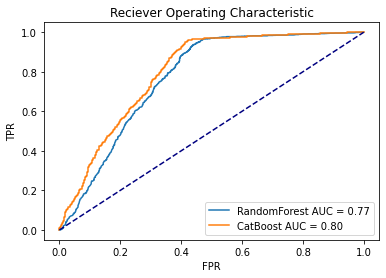

In [145]:
classifiers = {'RandomForest': RandomForestClassifier(),
              'CatBoost': CatBoostClassifier()}

y_true_dict = {'RandomForest': Y_val,
               'CatBoost': Y_val_cat}

y_pred_dict = {'RandomForest': Y_prob,
                'CatBoost': prob_predictions}

compare_classifiers(classifiers, y_true_dict, y_pred_dict)

### Note:
Will not dive into feature importances, hyper-tuning the parameters, or cross validation. Will evaluate now. Best model seems to be the CatBoost. 
- log loss: measures how well a a model can guess the true probability. Lower log loss means better predictions. CB log loss = 0.47 is much lower compared to RF log log loss (1.62)
- ROC AUC: performance measurement that predicts positive outcomes. Higher AUC means a better model. CB shows a better line on the ROC graph; and has a higher AUC score (AUC = 0.80) compared to RF's AUC (0.77).
- Classification Report: CB model shows a little higher stats in all categories.

Without fine tuning the model, CB exhibited farily decent predictive capability.

## 6 - Apply ML to Challenge Set

In [ ]:
predictions = cb.predict(test_cat_df)
submission = pd.DataFrame({
    'patient_id': test_cat_df['patient_id'],
    'DiagPeriodL90D': predictions
})
submission.to_csv('submission.csv', index=False)

In [47]:
submission.head()

,patient_id,DiaPeriodL90D
0,573710,1
1,593679,1
2,184532,1
3,447383,1
4,687972,1
